<a href="https://colab.research.google.com/github/mohameds277/Machine_learning/blob/main/Parkinsons_classfication.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [127]:
import pandas as pd


df = pd.read_csv('pd_speech_features.csv')

print(df.head())



   id  gender      PPE      DFA     RPDE  numPulses  numPeriodsPulses  \
0   0       1  0.85247  0.71826  0.57227        240               239   
1   0       1  0.76686  0.69481  0.53966        234               233   
2   0       1  0.85083  0.67604  0.58982        232               231   
3   1       0  0.41121  0.79672  0.59257        178               177   
4   1       0  0.32790  0.79782  0.53028        236               235   

   meanPeriodPulses  stdDevPeriodPulses  locPctJitter  ...  \
0          0.008064            0.000087       0.00218  ...   
1          0.008258            0.000073       0.00195  ...   
2          0.008340            0.000060       0.00176  ...   
3          0.010858            0.000183       0.00419  ...   
4          0.008162            0.002669       0.00535  ...   

   tqwt_kurtosisValue_dec_28  tqwt_kurtosisValue_dec_29  \
0                     1.5620                     2.6445   
1                     1.5589                     3.6107   
2          

# Checking the Dataset from imbalanced class , noices and Varying degrees of dimensionality.

In [128]:
class_distribution = df['class'].value_counts()
print(class_distribution)

minority_class_count = class_distribution.min()
majority_class_count = class_distribution.max()

imbalance_ratio = minority_class_count / majority_class_count
print("Imbalance Ratio:", imbalance_ratio)



1    564
0    192
Name: class, dtype: int64
Imbalance Ratio: 0.3404255319148936


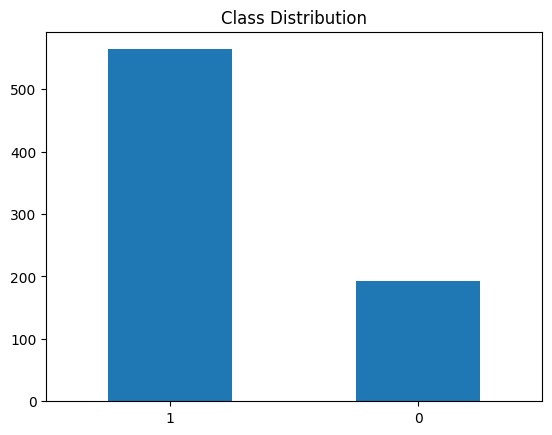

In [129]:
import matplotlib.pyplot as plt

class_distribution.plot(kind='bar', rot=0)
plt.title('Class Distribution')
plt.show()

In [119]:
print(df.isnull().mean() * 100)


id                           0.0
gender                       0.0
PPE                          0.0
DFA                          0.0
RPDE                         0.0
                            ... 
tqwt_kurtosisValue_dec_33    0.0
tqwt_kurtosisValue_dec_34    0.0
tqwt_kurtosisValue_dec_35    0.0
tqwt_kurtosisValue_dec_36    0.0
class                        0.0
Length: 755, dtype: float64


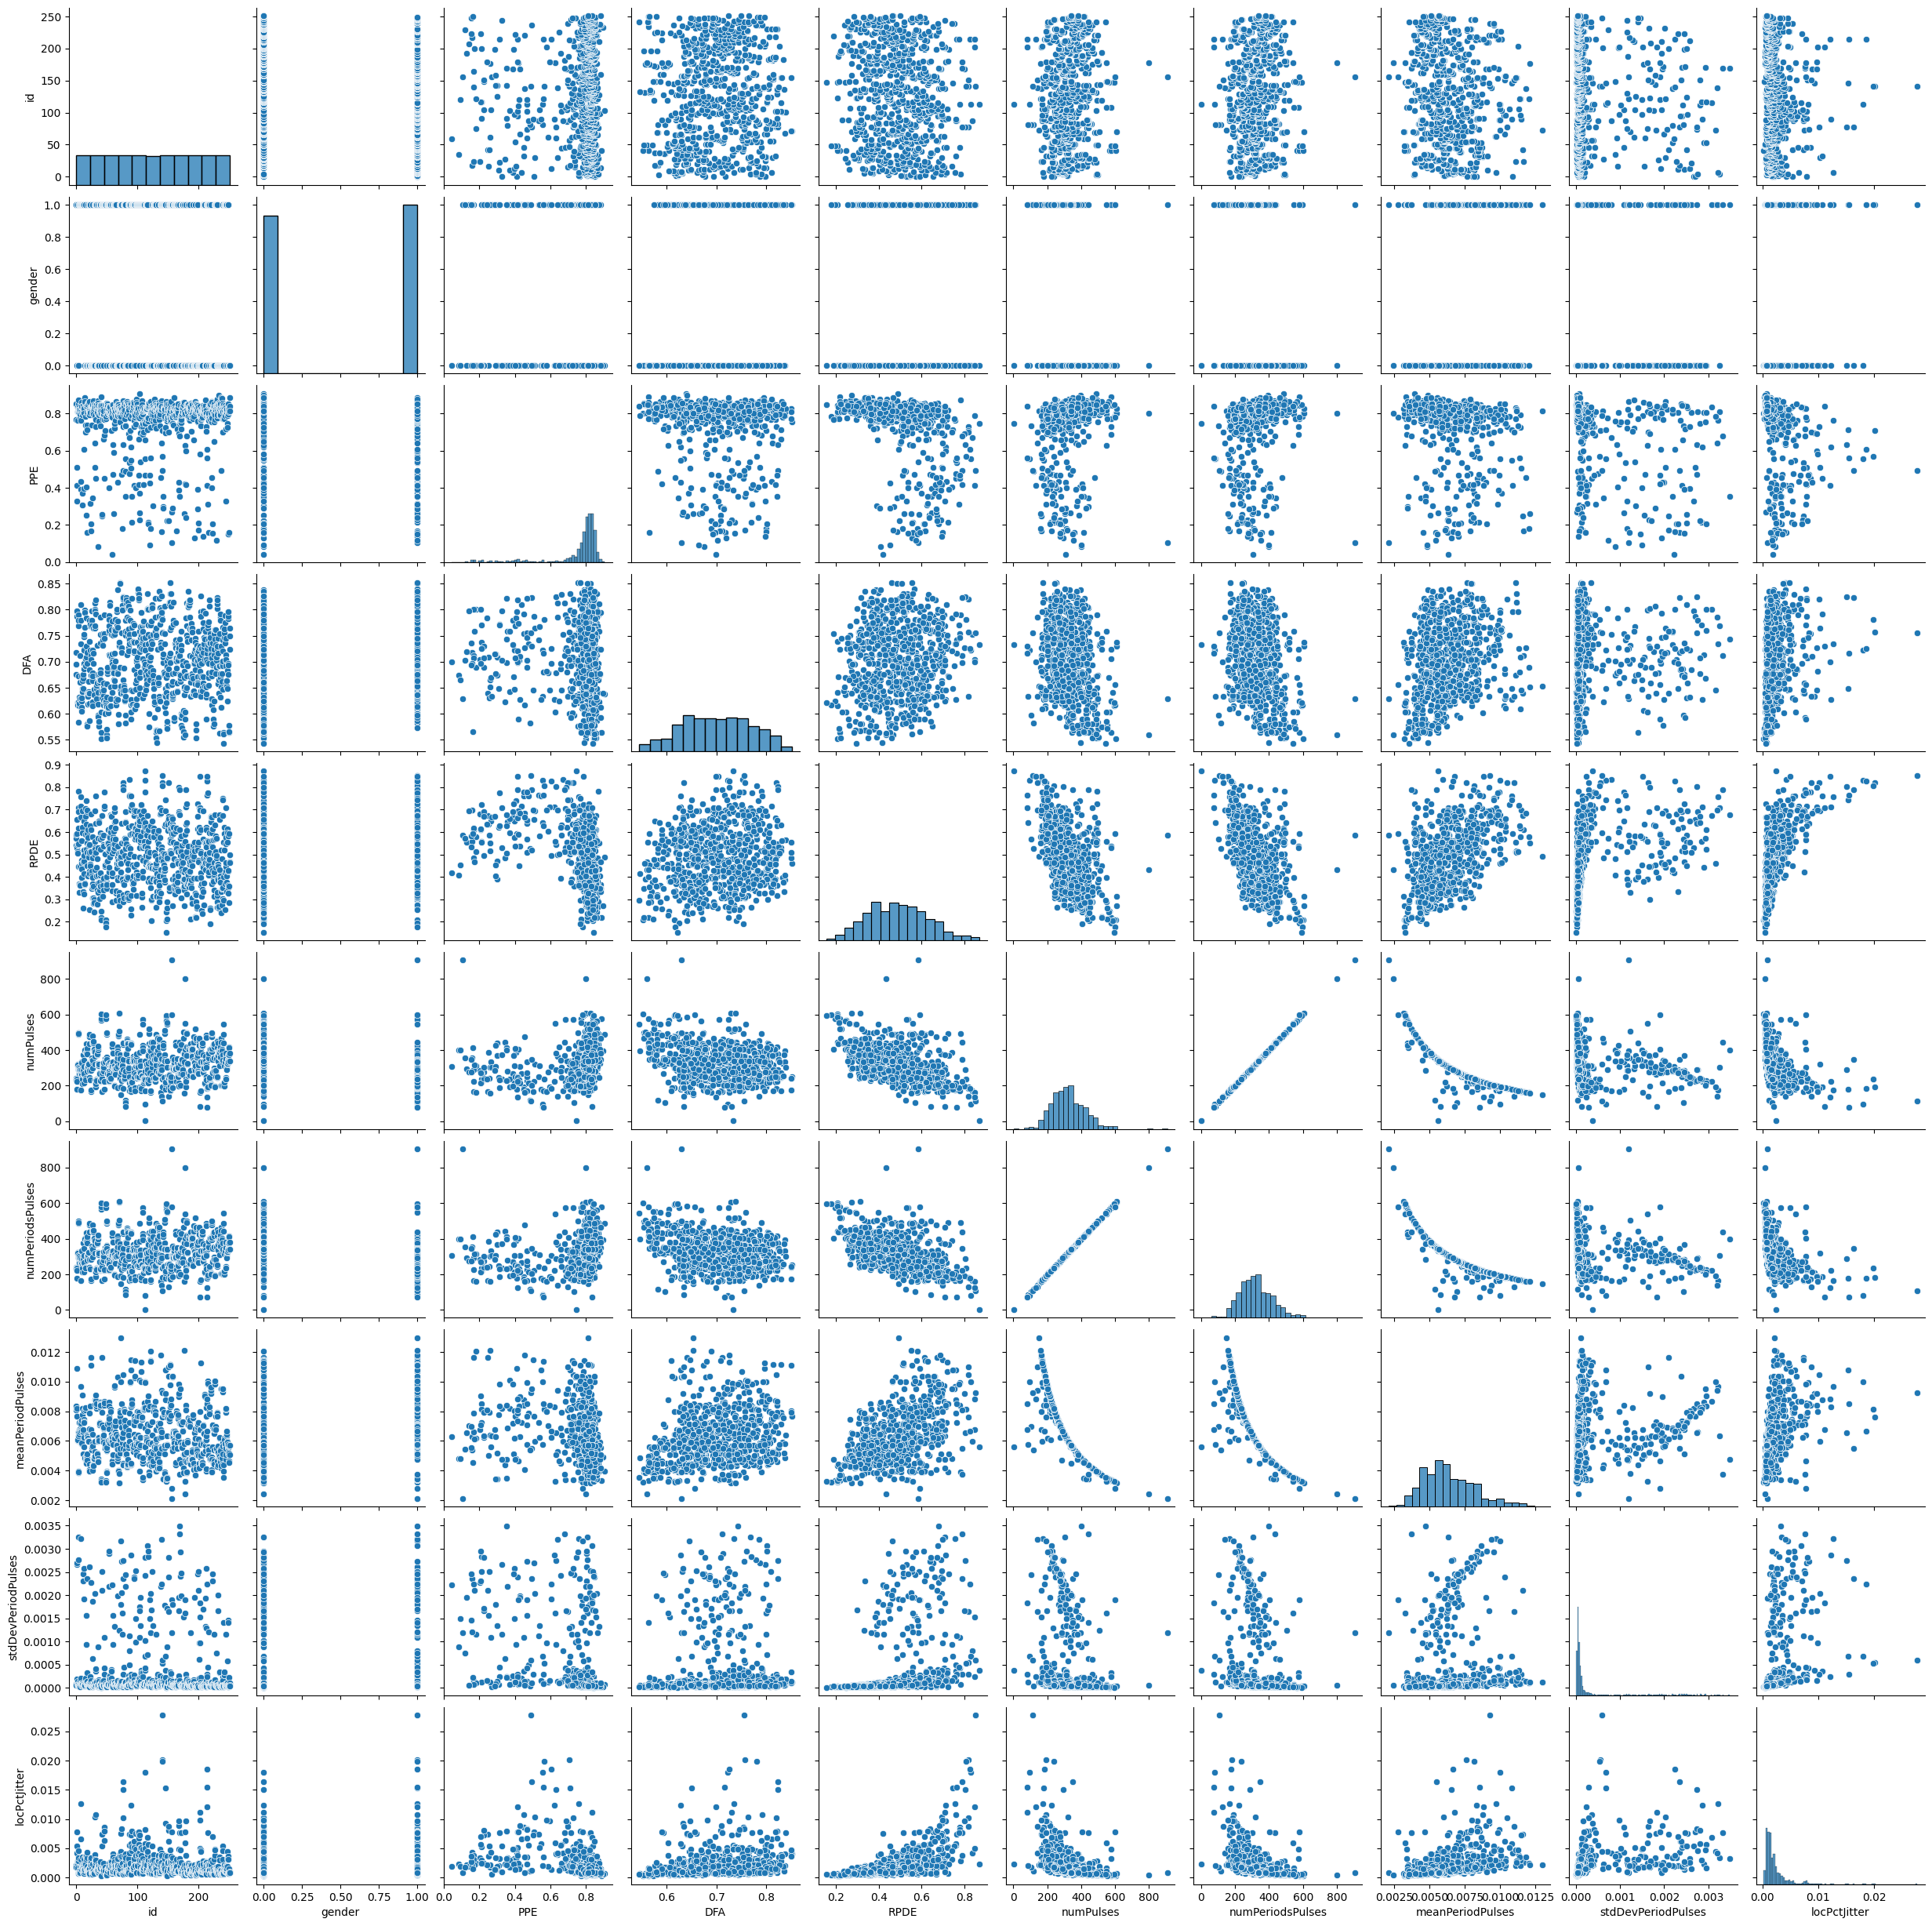

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a subset of features (e.g., first 10 columns)
subset_features = df.iloc[:, :10]

# Pair plot for the subset of features
sns.pairplot(subset_features)
plt.show()

# Random Forest

In [130]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


import time
from memory_profiler import profile

In [131]:
X = df.drop('class', axis=1)  # Features
y = df['class']                # Target

In [132]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [133]:
rf_start_time = time.time()

rf_classifier = RandomForestClassifier(
    n_estimators=100,
    max_depth=10,
    min_samples_split=2,
    min_samples_leaf=1,
    max_features='auto',
    random_state=42
)
rf_classifier.fit(X_train, y_train)

rf_end_time = time.time()
rf_training_time = rf_end_time - rf_start_time


y_pred = rf_classifier.predict(X_test)

rf_prediction_start_time = time.time()
rf_predictions = rf_classifier.predict(X)
rf_prediction_end_time = time.time()
rf_prediction_time = rf_prediction_end_time - rf_prediction_start_time


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


In [134]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.881578947368421
Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.58      0.71        38
           1       0.88      0.98      0.93       114

    accuracy                           0.88       152
   macro avg       0.90      0.78      0.82       152
weighted avg       0.89      0.88      0.87       152

Confusion Matrix:
 [[ 22  16]
 [  2 112]]


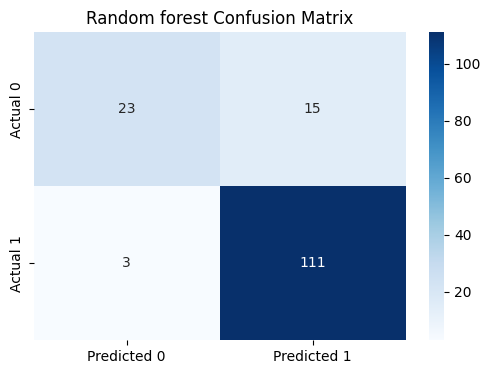

In [77]:
from sklearn.metrics import confusion_matrix

matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 4))
sns.heatmap(matrix, annot=True, fmt='g', cmap='Blues',
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.title('Random forest Confusion Matrix')
plt.show()


# XGBoost

In [78]:
import pandas as pd
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [79]:
X = df.drop('class', axis=1)  # Features
y = df['class']                # Target


In [80]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [123]:

xgb_start_time = time.time()

xgb_classifier =  XGBClassifier(
    learning_rate=0.1,  # Adjust the learning rate
    n_estimators=100,   # Adjust the number of trees
    max_depth=3,        # Adjust the maximum depth of each tree
    min_child_weight=1, # Adjust the minimum sum of instance weight in a child
    subsample=0.8,      # Adjust the fraction of samples used for training each tree
    colsample_bytree=0.8,  # Adjust the fraction of features used for training each tree
    random_state=42
)
xgb_classifier.fit(X_train, y_train)

xgb_end_time = time.time()

xgb_training_time = xgb_end_time - xgb_start_time


y_pred = xgb_classifier.predict(X_test)
xgb_prediction_start_time = time.time()
xgb_predictions = xgb_classifier.predict(X)
xgb_prediction_end_time = time.time()
xgb_prediction_time = xgb_prediction_end_time - xgb_prediction_start_time



In [124]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.875
Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.61      0.71        38
           1       0.88      0.96      0.92       114

    accuracy                           0.88       152
   macro avg       0.87      0.79      0.81       152
weighted avg       0.87      0.88      0.87       152

Confusion Matrix:
 [[ 23  15]
 [  4 110]]


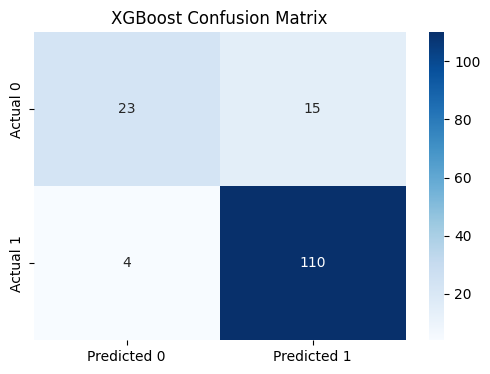

In [125]:
from sklearn.metrics import confusion_matrix

matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 4))
sns.heatmap(matrix, annot=True, fmt='g', cmap='Blues',
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.title('XGBoost Confusion Matrix')
plt.show()

# computational efficiency

**Timing**

In [84]:
print("Random Forest Training Time:", rf_training_time)
print("Random Forest Prediction Time:", rf_prediction_time)

print("XGBoost Training Time:", xgb_training_time)sn
print("XGBoost Prediction Time:", xgb_prediction_time)

Random Forest Training Time: 1.1867635250091553
Random Forest Prediction Time: 0.021431446075439453
XGBoost Training Time: 5.20599627494812
XGBoost Prediction Time: 0.08014559745788574


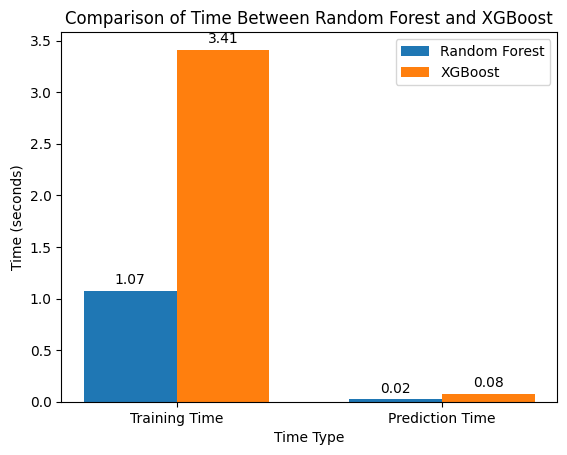

In [135]:
import matplotlib.pyplot as plt


labels = ['Training Time', 'Prediction Time']
rf_times = [rf_training_time, rf_prediction_time]
xgb_times = [xgb_training_time, xgb_prediction_time]




bar_width = 0.35
index = range(len(labels))

fig, ax = plt.subplots()
bar1 = ax.bar(index, rf_times, bar_width, label='Random Forest')
bar2 = ax.bar([i + bar_width for i in index], xgb_times, bar_width, label='XGBoost')

# Add labels, title, and legend
ax.set_xlabel('Time Type')
ax.set_ylabel('Time (seconds)')
ax.set_title('Comparison of Time Between Random Forest and XGBoost')
ax.set_xticks([i + bar_width / 2 for i in index])
ax.set_xticklabels(labels)
ax.legend()

# Display the values on top of the bars
def autolabel(bars):
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height:.2f}',
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(bar1)
autolabel(bar2)

plt.show()

**Memory**